<div class="alert alert-block alert-success">
    <b><center>TENSORFLOW 2 LIBRARY</center></b>
    <b><center>Model Training - Built-in training loops</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras import utils, layers, activations, models, losses, optimizers, metrics, callbacks

In [4]:
np.set_printoptions(linewidth=200, precision=2)
print("버전: ", tf.__version__)
print("즉시 실행 모드: ", tf.executing_eagerly())
print("GPU: ", "사용 가능" if tf.test.is_gpu_available() else "사용 불가능")
print("GPU Device: ", tf.config.experimental.get_visible_devices("GPU"))

버전:  2.4.1
즉시 실행 모드:  True
GPU:  사용 가능
GPU Device:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Prepare Data

In [5]:
iris = sns.load_dataset("iris")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [6]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
iris = iris[iris.species.isin(["setosa", "versicolor"])]

In [8]:
iris.replace({ "species": {"setosa": 0, "versicolor": 1} }, inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


In [10]:
data = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
label = iris[["species"]].values
data.shape, label.shape

((100, 4), (100, 1))

## Generate Model

In [11]:
inputs = tf.keras.Input((4,))

hl = layers.Dense(32, activation=activations.sigmoid)(inputs)
hl = layers.Dense(32, activation="relu")(hl)

outputs = layers.Dense(1, activation="sigmoid")(hl)

In [12]:
# inputs = tf.keras.Input((4,))

# hl1 = layers.Dense(32, activation=activations.sigmoid)(inputs)
# hl2 = layers.Dense(32, activation="relu")(inputs)
# reduce_avg = layers.average([hl1, hl2])

# outputs = layers.Dense(1, activation="sigmoid")(reduce_avg)

In [13]:
model = models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


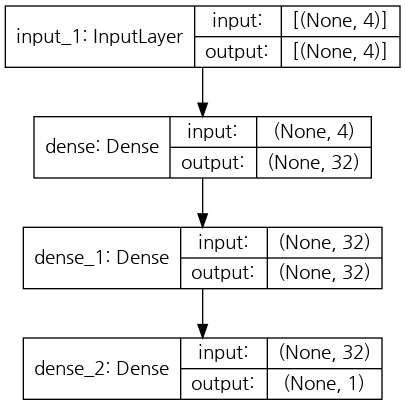

In [14]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [15]:
model.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(),
#     metrics=[metrics.Accuracy()]
    metrics=[metrics.BinaryAccuracy()]
)

## Training

In [16]:
history = model.fit(
    x=data,
    y=label,
    epochs=200,
    batch_size=50,
#     callbacks=[callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)]
    callbacks=[
        callbacks.EarlyStopping(monitor='binary_accuracy', mode='max', verbose=1, patience=5, baseline=0.6),
        callbacks.ModelCheckpoint('best_model.h5', monitor='binary_accuracy', mode='max', save_best_only=True)
    ]
)

Epoch 1/200
2/2 [==============================] - 1s 2ms/step - loss: 0.6796 - binary_accuracy: 0.4600
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6597 - binary_accuracy: 0.5200
Epoch 3/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6535 - binary_accuracy: 0.5267
Epoch 5/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6507 - binary_accuracy: 0.7133
Epoch 6/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6426 - binary_accuracy: 0.9867
Epoch 7/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6391 - binary_accuracy: 1.0000
Epoch 8/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6337 - binary_accuracy: 1.0000
Epoch 9/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6278 - binary_accuracy: 1.0000
Epoch 10/200
2/2 [==============================] - 0s 2ms/step 

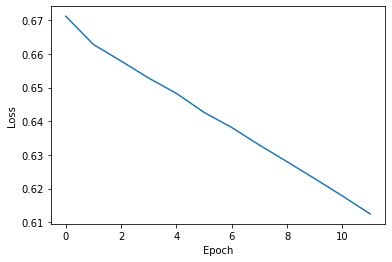

In [17]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
plt.show()